In [1]:
import matplotlib.pyplot as plt
import cxgnncomp as cxgc
import torch
import seaborn as sns

dset = "arxiv"
x, ptr, idx, b = cxgc.prepare_data_full_graph(
    dset,
    feat_len=1,
    num_head=1,
)

deg = ptr[1:] - ptr[:-1]
sorted, indices = torch.sort(deg)

Loading full graph structure... dataset=arxiv feature length=1 num_head=1


### This plot is for LSTM optimization, which batches seqs with different lengths to improve parallelism, with 9x performance improvement

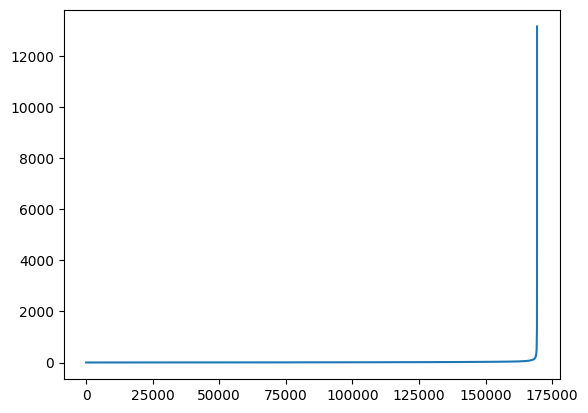

In [2]:
plt.plot(sorted.cpu().numpy())

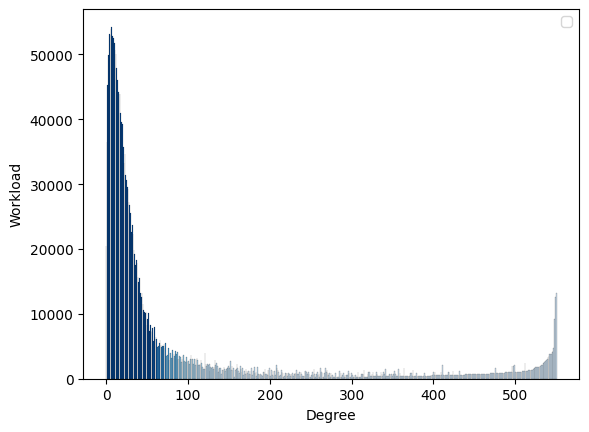

In [4]:
cp = sns.color_palette("Blues", 13)
batch_size = torch.bincount(deg)
seq_len = torch.arange(batch_size.shape[0], device=batch_size.device)[batch_size > 0]
batch_size = batch_size[batch_size > 0]
workload = (batch_size * seq_len).cpu().numpy()
batch_size[batch_size > 100] = 100
colors = [cp[x // 10 + 2] for x in batch_size.cpu().numpy()]
# count = torch.cumsum(count, dim=0)
plt.bar(range(workload.shape[0]),
        workload,
        color=colors,
        edgecolor="black",
        linewidth=0.1)
plt.xlabel("Degree")
plt.ylabel("Workload")
plt.legend()